In [1]:
import scanpy as sc

In [2]:
stardist = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_stardist_binning_stats.h5ad')

In [3]:
voronoi = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_voronoi_binning_stats.h5ad')


In [8]:
stardist

AnnData object with n_obs × n_vars = 85721 × 313
    obs: 'id', 'CellType', 'similarity', 'cell_id', 'realCellType'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'CellType_colors', 'neighbors', 'pca', 'realCellType_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
stardist.obs['similarity']

0        0.468712
1        0.310691
2        0.517598
3        0.319347
4        0.484844
           ...   
88431    0.367559
88432    0.222161
88433    0.421155
88434    0.482780
88435    0.179596
Name: similarity, Length: 85721, dtype: float64

In [6]:
voronoi.obs['similarity']

0         0.352666
1         0.535550
2         0.403764
3         0.500580
4         0.288869
            ...   
118387    0.528659
118388    0.438774
118389    0.313558
118390    0.530596
118391    0.348656
Name: similarity, Length: 113689, dtype: float64

/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_3875/563369151.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0], x='Method', y='Similarity', data=data, palette='muted')
/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_3875/563369151.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[1], x='Method', y='n_genes_by_counts', data=data, palette='muted')
/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_3875/563369151.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[2], x=

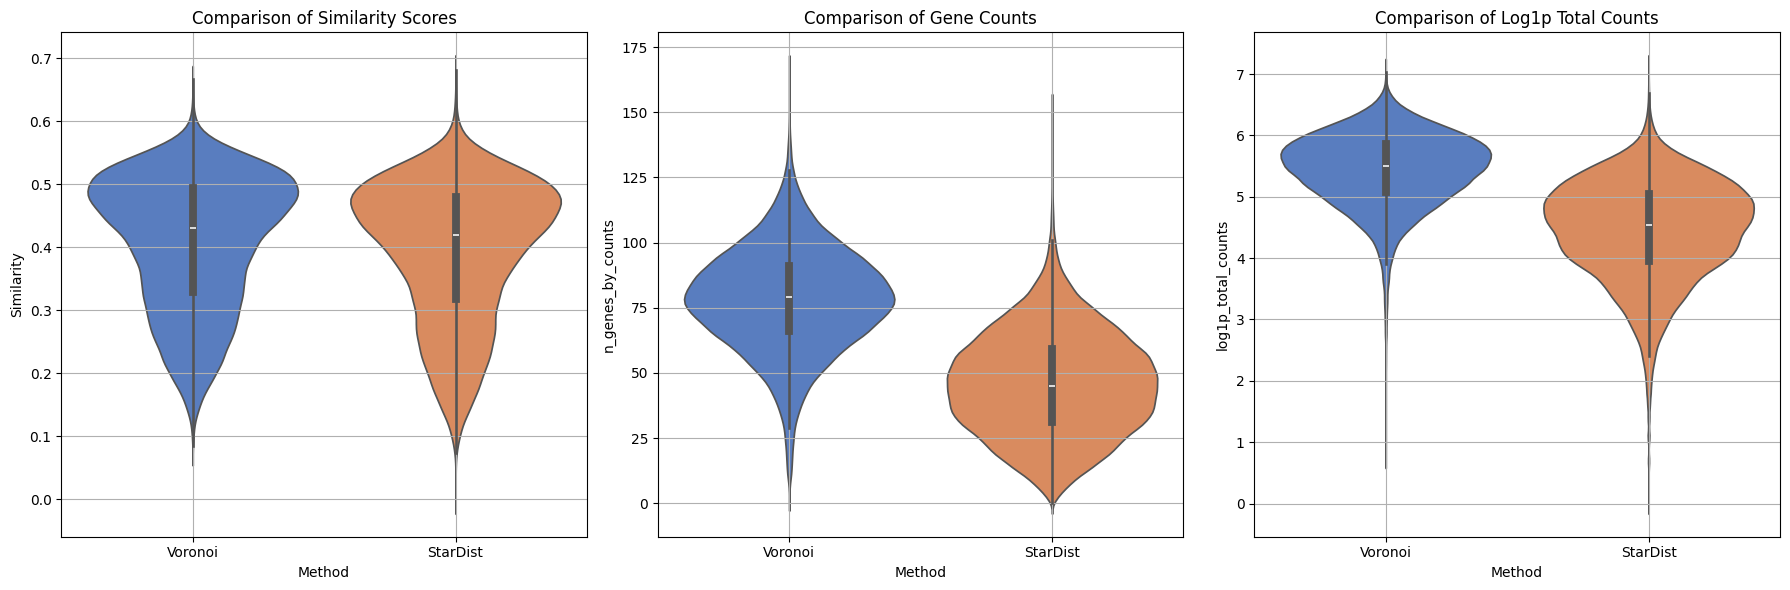

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc

# Extract the 'similarity', 'n_genes_by_counts', and 'log1p_total_counts' values from both datasets
voronoi_similarity = voronoi.obs['similarity']
stardist_similarity = stardist.obs['similarity']

voronoi_n_genes = voronoi.obs['n_genes_by_counts']
stardist_n_genes = stardist.obs['n_genes_by_counts']

voronoi_log1p_total_counts = voronoi.obs['log1p_total_counts']
stardist_log1p_total_counts = stardist.obs['log1p_total_counts']

# Combine the data into a DataFrame for easy plotting
data = pd.DataFrame({
    'Similarity': pd.concat([voronoi_similarity, stardist_similarity]),
    'n_genes_by_counts': pd.concat([voronoi_n_genes, stardist_n_genes]),
    'log1p_total_counts': pd.concat([voronoi_log1p_total_counts, stardist_log1p_total_counts]),
    'Method': ['Voronoi'] * len(voronoi_similarity) + ['StarDist'] * len(stardist_similarity)
})

# Create violin plots side by side for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Violin plot for 'similarity'
sns.violinplot(ax=axes[0], x='Method', y='Similarity', data=data, palette='muted')
axes[0].set_title('Comparison of Similarity Scores')
axes[0].set_ylabel('Similarity')
axes[0].set_xlabel('Method')
axes[0].grid(True)

# Violin plot for 'n_genes_by_counts'
sns.violinplot(ax=axes[1], x='Method', y='n_genes_by_counts', data=data, palette='muted')
axes[1].set_title('Comparison of Gene Counts')
axes[1].set_ylabel('n_genes_by_counts')
axes[1].set_xlabel('Method')
axes[1].grid(True)

# Violin plot for 'log1p_total_counts'
sns.violinplot(ax=axes[2], x='Method', y='log1p_total_counts', data=data, palette='muted')
axes[2].set_title('Comparison of Log1p Total Counts')
axes[2].set_ylabel('log1p_total_counts')
axes[2].set_xlabel('Method')
axes[2].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


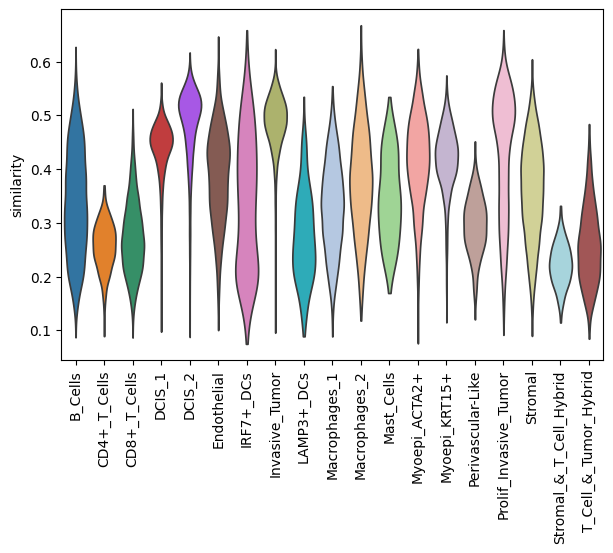

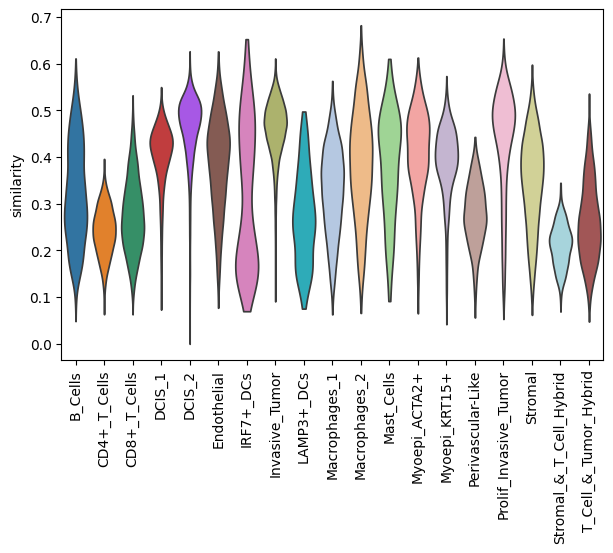

In [11]:
import scanpy as sc

# Assuming voronoi and stardist are your AnnData objects
# Plot the similarity distributions for both voronoi and stardist

# For voronoi
sc.pl.violin(voronoi, keys='similarity', groupby='CellType', jitter=0.4, rotation=90, size=1, stripplot=False)

# For stardist
sc.pl.violin(stardist, keys='similarity', groupby='CellType', jitter=0.4, rotation=90, size=1, stripplot=False)


In [14]:
print(voronoi.X.shape)  # Should be (n_cells, n_genes)
print(voronoi.var.shape)  # Should be (n_genes, n_features)

(113689, 313)
(313, 7)


In [23]:
voronoi.obs

,id,CellType,similarity,cell_id,realCellType
0,ID_100000,Stromal,0.352666,142883.0,Stromal
1,ID_100001,DCIS_2,0.535550,141638.0,DCIS_2
2,ID_100002,Stromal,0.403764,133378.0,Stromal
3,ID_100004,DCIS_2,0.500580,141054.0,DCIS_2
4,ID_100006,Stromal,0.288869,141241.0,Stromal
...,...,...,...,...,...
118387,ID_99993,DCIS_2,0.528659,141635.0,DCIS_2
118388,ID_99996,DCIS_2,0.438774,141055.0,Myoepi_KRT15+
118389,ID_99997,Stromal,0.313558,134602.0,Stromal
118390,ID_99998,DCIS_2,0.530596,145875.0,DCIS_2


In [15]:
print(voronoi.var_names)

Index(['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ',
       'AGR3', 'AHSP', 'AIF1',
       ...
       'TUBB2B', 'TYROBP', 'UCP1', 'USP53', 'VOPP1', 'VWF', 'WARS', 'ZEB1',
       'ZEB2', 'ZNF562'],
      dtype='object', name='feature_name', length=313)


In [21]:
stardist

AnnData object with n_obs × n_vars = 85721 × 313
    obs: 'id', 'CellType', 'similarity', 'cell_id', 'realCellType'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'CellType_colors', 'neighbors', 'pca', 'realCellType_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [24]:
sc.pp.calculate_qc_metrics(stardist, inplace=True, percent_top=[50, 100, 200])

In [25]:
sc.pp.calculate_qc_metrics(voronoi, inplace=True, percent_top=[50, 100, 200])

In [26]:
stardist

AnnData object with n_obs × n_vars = 85721 × 313
    obs: 'id', 'CellType', 'similarity', 'cell_id', 'realCellType', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'CellType_colors', 'neighbors', 'pca', 'realCellType_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

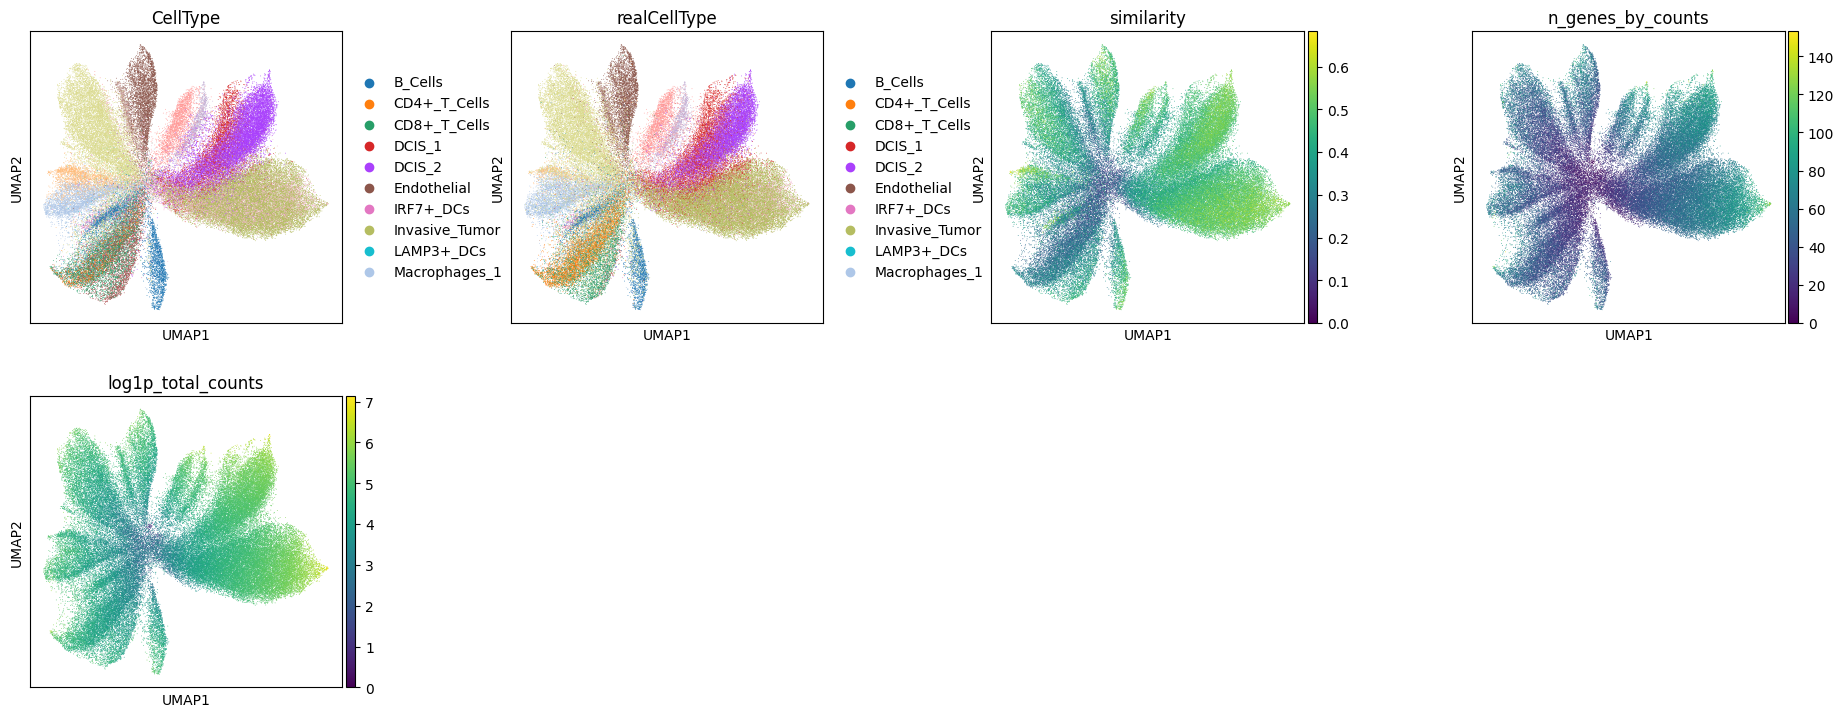

In [29]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(stardist, color=["CellType", "realCellType", 'similarity', 'n_genes_by_counts', 'log1p_total_counts'], wspace=0.4)

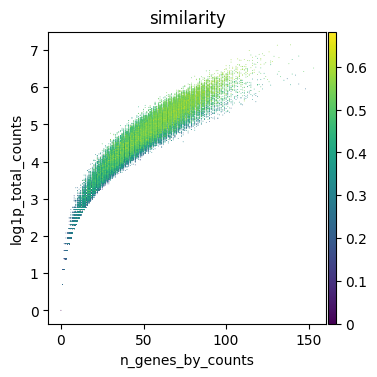

In [30]:
sc.pl.scatter(stardist, x='n_genes_by_counts', y='log1p_total_counts', color='similarity')

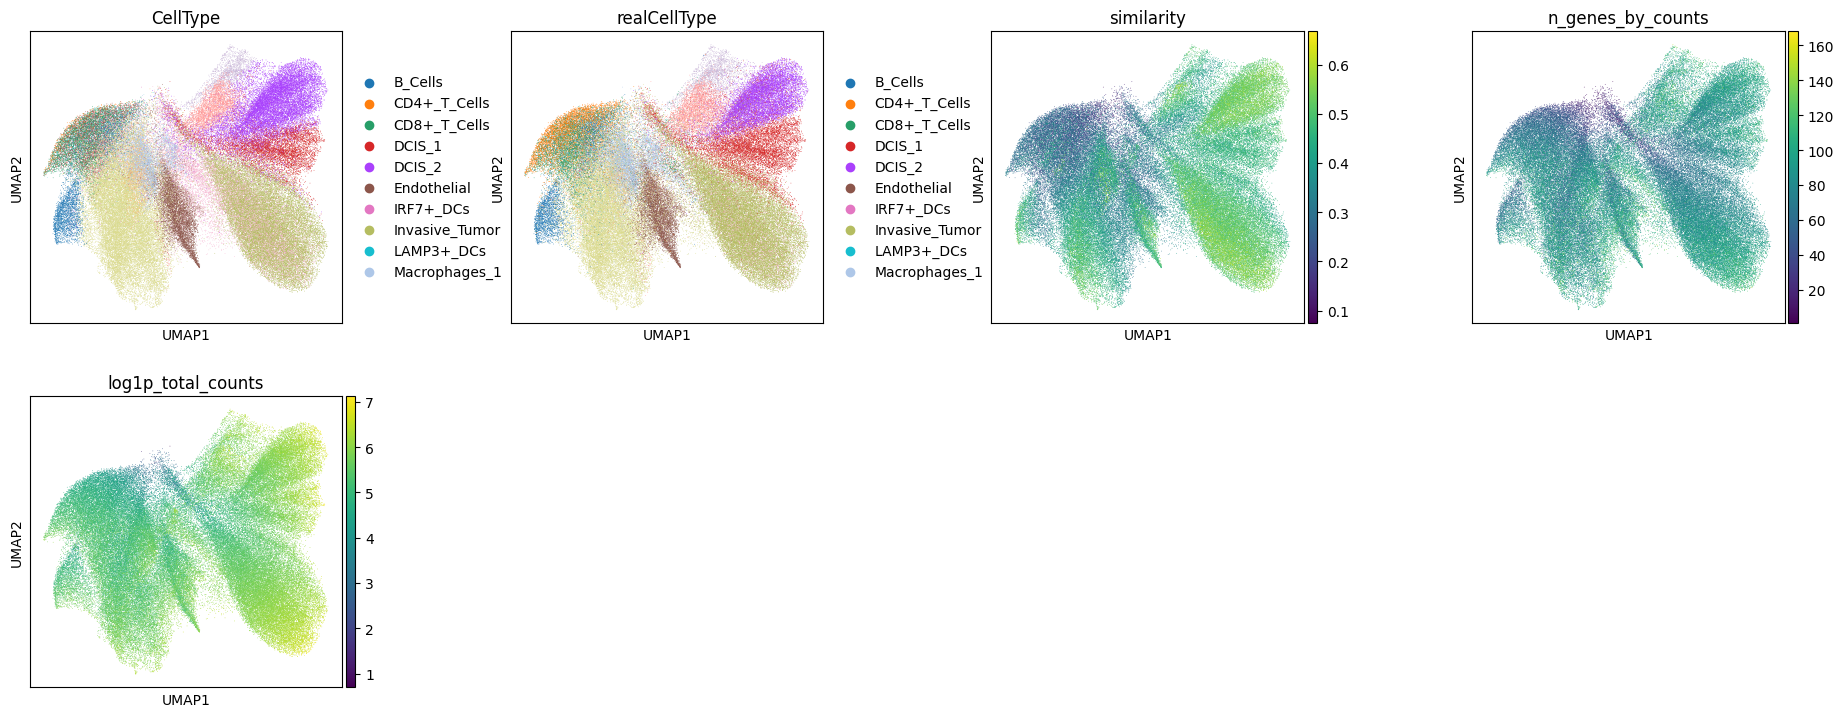

In [31]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(voronoi, color=["CellType", "realCellType", 'similarity', 'n_genes_by_counts', 'log1p_total_counts'], wspace=0.4)

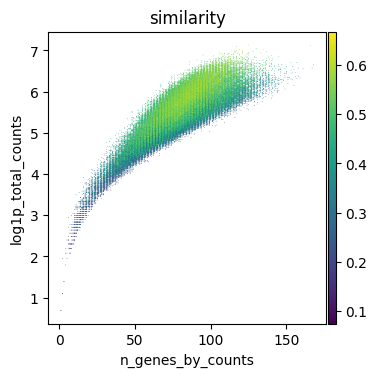

In [32]:
sc.pl.scatter(voronoi, x='n_genes_by_counts', y='log1p_total_counts', color='similarity')